<a href="https://colab.research.google.com/github/James606240/NTUT_Test/blob/main/house_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import requests

from tensorflow import keras
from tensorflow.keras import layers

url = 'https://raw.githubusercontent.com/James606240/NTUT_Test/main/kc_house_data.csv'
#Not OK：https://github.com/James606240/NTUT_Test/blob/main/kc_house_data.csv
data = pd.read_csv(url)
data.shape
pd.options.display.max_columns = 21
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [123]:
data.dtypes
data['year'] = pd.to_numeric(data['date'].str.slice(0, 4))
data['month'] = pd.to_numeric(data['date'].str.slice(4, 6))
data['day'] = pd.to_numeric(data['date'].str.slice(6, 8))
pd.options.display.max_columns = 24
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,5,12
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,2015,4,15
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015,3,12


In [124]:
data.drop(['id'], axis="columns", inplace=True)
data.drop(['date'], axis="columns", inplace=True)
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,5,12
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,2015,4,15
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015,3,12


In [125]:
data_num = data.shape[0]
indexes = np.random.permutation(data_num)
train_indexes = indexes[:int(data_num *0.6)]
val_indexes = indexes[int(data_num *0.6):int(data_num *0.8)]
test_indexes = indexes[int(data_num *0.8):]
train_data = data.loc[train_indexes]
val_data = data.loc[val_indexes]
test_data = data.loc[test_indexes]

In [126]:
train_data.shape

(12967, 22)

In [127]:
val_data.shape

(4323, 22)

In [128]:
test_data.shape

(4323, 22)

In [129]:
train_validation_data = pd.concat([train_data, val_data])
#train_data及val_data資料合併
mean = train_validation_data.mean()
std = train_validation_data.std()

train_data = (train_data - mean) / std
val_data = (val_data - mean) / std
train_data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
13146,0.687117,0.673789,1.472719,1.748169,-0.225279,0.938811,-0.086698,-0.306296,-0.628973,1.154186,1.276730,1.241542,1.089150,-0.211143,-0.948732,-0.166933,1.040152,2.385923,-0.244980,-0.689733,-0.506069,-0.424984
1341,1.159810,1.739645,0.825119,1.049951,-0.117701,0.938811,-0.086698,-0.306296,-0.628973,2.008535,1.519065,-0.659057,0.748042,-0.211143,-1.340607,-0.048844,0.671499,1.277418,-0.124005,-0.689733,-0.184912,-1.465757
3394,0.043074,-1.457924,0.501319,-0.782871,-0.330752,0.938811,-0.086698,-0.306296,-0.628973,0.299837,-0.892175,0.042354,0.884485,-0.211143,0.637431,0.471758,-0.554981,-0.808322,-0.303482,-0.689733,-0.506069,-0.887550
2600,0.535965,-0.392067,0.501319,0.089902,-0.126527,0.938811,-0.086698,-0.306296,0.908774,1.154186,0.452788,-0.659057,0.611598,-0.211143,-0.482213,0.801545,0.508441,1.569130,-0.178573,-0.689733,0.457403,-0.540625
11936,0.928710,0.673789,0.501319,1.671802,-0.045114,0.938811,-0.086698,-0.306296,-0.628973,2.008535,2.209722,-0.659057,0.850374,-0.211143,-0.053016,0.193816,1.699473,1.481616,-0.071222,1.449752,-0.827226,-0.309342
11075,-0.612787,-0.392067,-0.470081,-0.990154,-0.267349,-0.915326,-0.086698,-0.306296,-0.628973,-1.408861,-1.292029,0.359121,-0.957501,4.778663,0.525466,-0.210857,-0.994528,-1.245890,-0.318053,-0.689733,1.099718,1.309637
6274,0.032905,0.673789,1.796519,1.104500,-0.111650,-0.915326,-0.086698,-0.306296,-0.628973,0.299837,0.489138,1.377299,0.679820,-0.211143,-0.818106,1.135652,-0.002001,0.314769,-0.193909,-0.689733,1.742032,-0.540625
4437,-0.247275,-1.457924,-0.146281,-0.444671,-0.177135,-0.915326,-0.086698,-0.306296,0.908774,-1.408861,-1.122394,1.173663,-1.776161,-0.211143,0.898681,-0.099248,-1.157586,-0.997935,-0.180722,1.449752,-1.148384,1.193996
1620,-0.906846,-0.392067,-0.470081,-1.099251,-0.190815,-0.915326,-0.086698,-0.306296,-0.628973,-0.554512,-0.867942,-0.659057,0.782153,-0.211143,-1.265964,-1.774822,1.352089,-0.735394,-0.201486,-0.689733,0.136246,1.540920
7990,1.144694,-0.392067,0.177519,0.395372,-0.131286,-0.915326,-0.086698,2.326495,0.908774,0.299837,0.052934,0.721140,0.099936,-0.211143,-1.303285,0.390392,0.728215,1.087805,-0.110819,1.449752,-0.827226,-0.887550


In [130]:
train_validation_data.shape

(17290, 22)

In [131]:
train_data.shape

(12967, 22)

In [132]:
val_data.shape

(4323, 22)

In [133]:
arr = [[10, 20, 25],[25, 40, 50]]
print("算術平均數",np.mean(arr))

算術平均數 28.333333333333332


In [134]:
arr = [[10, 20, 25],[25, 40, 50]]
print("標準差",np.std(arr))

標準差 13.123346456686352


In [135]:
#@title 預設標題文字
x_train = np.array(train_data.drop('price', axis='columns'))
#drop丟棄此欄位
y_train = np.array(train_data['price'])
x_val = np.array(val_data.drop('price', axis='columns'))
y_val = np.array(val_data['price'])
#axis=1等价于axis='columns'
#axis=1row-wise
print(y_train)

[ 0.68711706  1.15980958  0.04307351 ... -0.59918371 -0.19849436
 -0.55782311]


In [136]:
print(x_train)

[[ 0.67378896  1.47271895  1.7481694  ... -0.68973337 -0.50606888
  -0.42498388]
 [ 1.73964541  0.82511889  1.04995144 ... -0.68973337 -0.18491157
  -1.46575663]
 [-1.45792395  0.50131886 -0.78287071 ... -0.68973337 -0.50606888
  -0.88754954]
 ...
 [-0.3920675   0.50131886 -0.10647206 ... -0.68973337  0.77856037
   0.03758179]
 [-0.3920675  -0.79388127 -0.89196726 ... -0.68973337 -0.50606888
  -0.07805963]
 [-1.45792395 -0.47008124 -0.88105761 ...  1.44975174 -1.79069813
  -0.30934246]]


In [137]:
y_train.shape

(12967,)

In [138]:
model = keras.Sequential(name='model-1')
# 第1層全連接層設為64個unit，將輸入形狀設定為(21, )，而實際上我們輸入的數據形狀為(batch_size, 21)
model.add(layers.Dense(64, activation='relu', input_shape=(21,), name="layer1"))
# 第2層全連接層設為64個unit
model.add(layers.Dense(64, activation='relu', name="layer2"))
# 最後一層全連接層設為1個unit
model.add(layers.Dense(1, name="layer3"))
# 顯示網路模型架構
model.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 64)                1408      
_________________________________________________________________
layer2 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer3 (Dense)               (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.compile(keras.optimizers.Adam(0.001),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

In [140]:
model_dir = 'lab3-logs/models/'
os.makedirs(model_dir)

FileExistsError: ignored

In [142]:
# TensorBoard回調函數會幫忙紀錄訓練資訊，並存成TensorBoard的紀錄檔
log_dir = os.path.join('lab3-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# ModelCheckpoint回調函數幫忙儲存網路模型，可以設定只儲存最好的模型，「monitor」表示被監測的數據，「mode」min則代表監測數據越小越好。
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', 
                                        monitor='val_mean_absolute_error', 
                                        save_best_only=True, 
                                        mode='min')

In [144]:
history = model.fit(x_train, y_train,  # 傳入訓練數據
               batch_size=64,  # 批次大小設為64
               epochs=50,  # 整個dataset訓練300遍
               validation_data=(x_val, y_val),  # 驗證數據
               callbacks=[model_cbk, model_mckp])  # Tensorboard回調函數紀錄訓練過程，ModelCheckpoint回調函數儲存最好的模型

Epoch 1/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0388 - mean_absolute_error: 0.1408 - val_loss: 0.1472 - val_mean_absolute_error: 0.2272
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0405 - mean_absolute_error: 0.1441 - val_loss: 0.1403 - val_mean_absolute_error: 0.2130
Epoch 3/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0430 - mean_absolute_error: 0.1459 - val_loss: 0.1353 - val_mean_absolute_error: 0.2128
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0373 - mean_absolute_error: 0.1375 - val_loss: 0.1381 - val_mean_absolute_error: 0.2179
Epoch 5/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0385 - mean_absolute_error: 0.1407 - val_loss: 0.1360 - val_mean_absolute_error: 0.2143
Epoch 6/50
203/203 [==============================] - 0s 2ms/step - loss: 0.0356 - mean_absolute_error: 0.1369 - val_loss: 0.1398 - val_mean_absolute_error: 0.2121
Epoch 7/50
203/2

In [145]:
history.history.keys()  # 查看history儲存的資訊有哪些

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

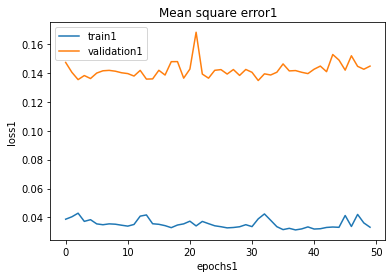

In [146]:
plt.plot(history.history['loss'], label='train1')
plt.plot(history.history['val_loss'], label='validation1')
plt.title('Mean square error1')
plt.ylabel('loss1')
plt.xlabel('epochs1')
plt.legend(loc='best')
#原為plt.legend(loc='upper right')

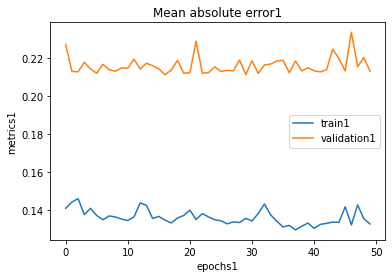

In [147]:
plt.plot(history.history['mean_absolute_error'], label='train1')
plt.plot(history.history['val_mean_absolute_error'], label='validation1')
plt.title('Mean absolute error1')
plt.ylabel('metrics1')
plt.xlabel('epochs1')
plt.legend(loc='best')
#原為plt.legend(loc='upper right')

In [156]:
# 載入模型
model = keras.models.load_model('lab2-logs/models/Best-model-1.h5')
# 先將房屋價格取出
y_test = np.array(test_data['price'])
# 標準化數據
test_data = (test_data - mean) / std
# 將輸入數據存成Numpy 格式
x_test = np.array(test_data.drop('price', axis='columns'))
# 預測測試數據
y_pred = model.predict(x_test)
# 將預測結果轉換回來(因為訓練時的訓練目標也有經過標準化)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
# 計算平均的誤差百分比
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
# 顯示誤差百分比
print("Model Percentage Error: {:.3f}%".format(percentage_error))

Model Percentage Error: -32972044790918.703%
